In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [2]:
path = "https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class08/drug200.csv"
data = pd.read_csv(path)
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
X = data.iloc[:,:-1]
Y = np.array(data.iloc[:,-1:])
dummy_x = pd.get_dummies(X)
dummy_x.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0


In [4]:
dummy_x = np.array(dummy_x)
dummy_x

array([[23.   , 25.355,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [47.   , 13.093,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [47.   , 10.114,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [52.   ,  9.894,  0.   , ...,  1.   ,  1.   ,  0.   ],
       [23.   , 14.02 ,  0.   , ...,  1.   ,  0.   ,  1.   ],
       [40.   , 11.349,  1.   , ...,  0.   ,  0.   ,  1.   ]])

In [5]:
train_x, test_x, train_y, test_y = train_test_split(dummy_x, Y, test_size=0.2, random_state=10)
print(f"train x shape: {train_x.shape}")
print(f"train y shape: {train_y.shape}")

train x shape: (160, 9)
train y shape: (160, 1)


In [6]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion="entropy",max_depth=4, random_state=10)

In [7]:
dc.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [8]:
from sklearn import metrics
y_predicted = dc.predict(test_x)
dc_accuracy= metrics.accuracy_score(test_y, y_predicted)
print(f"Decision tree accuracy score: {dc_accuracy}")

Decision tree accuracy score: 1.0


[Text(0.625, 0.9, 'Na_to_K <= 14.829\nentropy = 1.915\nsamples = 160\nvalue = [17, 13, 10, 45, 75]\nclass = drugC'), Text(0.5, 0.7, 'BP_HIGH <= 0.5\nentropy = 1.728\nsamples = 85\nvalue = [17, 13, 10, 45, 0]\nclass = drugB'), Text(0.25, 0.5, 'BP_LOW <= 0.5\nentropy = 0.684\nsamples = 55\nvalue = [0, 0, 10, 45, 0]\nclass = drugB'), Text(0.125, 0.3, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 0, 29, 0]\nclass = drugB'), Text(0.375, 0.3, 'Cholesterol_HIGH <= 0.5\nentropy = 0.961\nsamples = 26\nvalue = [0, 0, 10, 16, 0]\nclass = drugB'), Text(0.25, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [0, 0, 0, 16, 0]\nclass = drugB'), Text(0.5, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]\nclass = drugA'), Text(0.75, 0.5, 'Age <= 50.5\nentropy = 0.987\nsamples = 30\nvalue = [17, 13, 0, 0, 0]\nclass = drugY'), Text(0.625, 0.3, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]\nclass = drugY'), Text(0.875, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]\nclass = drugX'

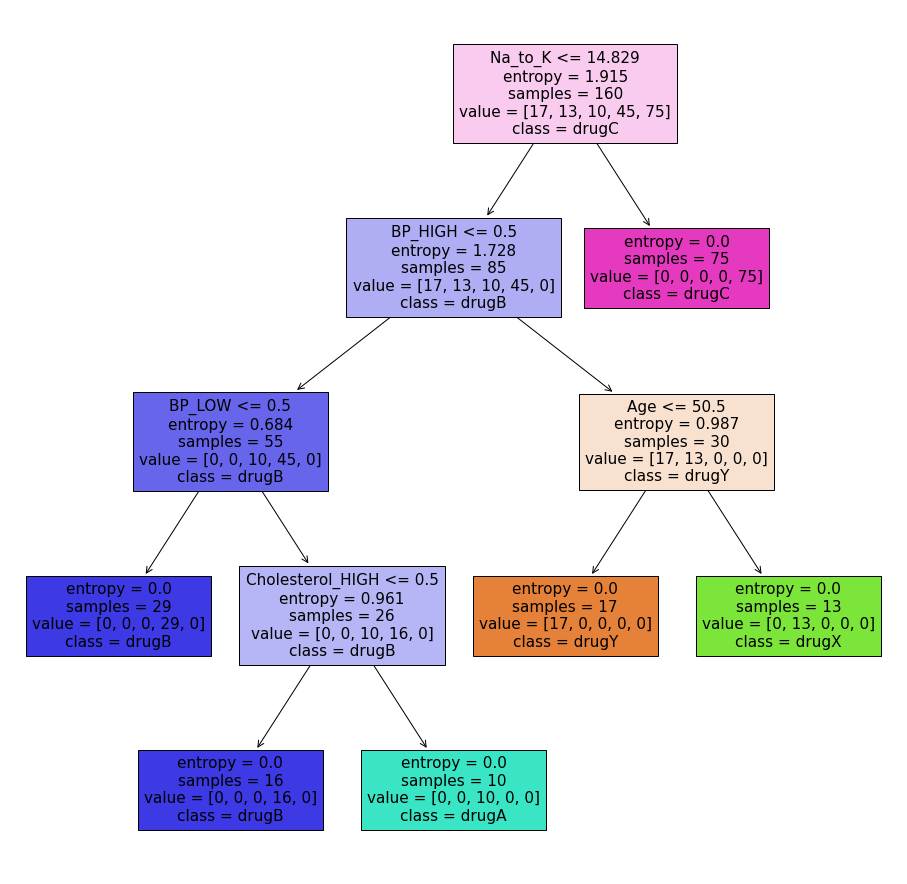

In [9]:
from sklearn import tree 
plt.figure(figsize=(16,16))
tree_plt1= tree.plot_tree(dc, feature_names=["Age",	"Na_to_K",	"Sex_F",	"Sex_M",	"BP_HIGH",	"BP_LOW",	"BP_NORMAL",	"Cholesterol_HIGH",	"Cholesterol_NORMAL"], 
                          class_names=["drugY","drugX","drugA","drugB","drugC"], filled=True)

print(tree_plt1)

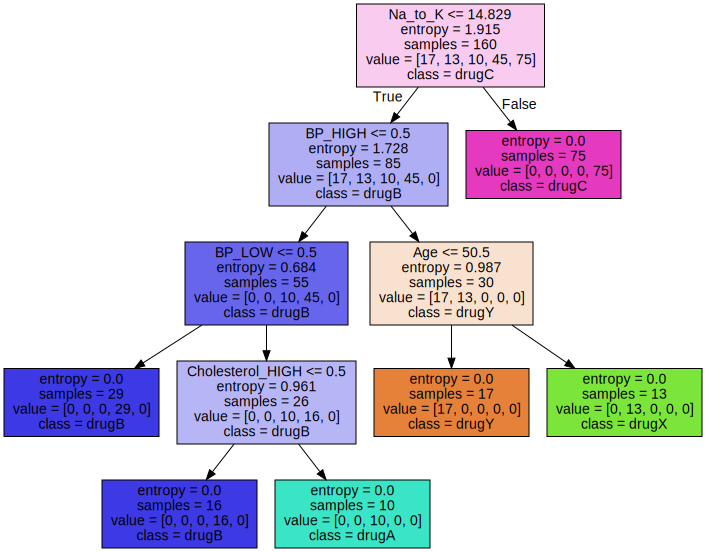

In [17]:
import graphviz
tree_plt2 = tree.export_graphviz(dc, out_file=None, feature_names=["Age",	"Na_to_K",	"Sex_F",	"Sex_M",	"BP_HIGH",	"BP_LOW",	"BP_NORMAL",	
                                                                   "Cholesterol_HIGH",	"Cholesterol_NORMAL"],
                                 class_names=["drugY","drugX","drugA","drugB","drugC"], filled=True)
graph = graphviz.Source(tree_plt2, format="png")
graph

In [19]:
tree_plt3 = tree.export_text(dc, feature_names=["Age",	"Na_to_K",	"Sex_F",	"Sex_M",	"BP_HIGH",	"BP_LOW",	"BP_NORMAL",	
                                                                   "Cholesterol_HIGH",	"Cholesterol_NORMAL"])
print(tree_plt3)

|--- Na_to_K <= 14.83
|   |--- BP_HIGH <= 0.50
|   |   |--- BP_LOW <= 0.50
|   |   |   |--- class: drugX
|   |   |--- BP_LOW >  0.50
|   |   |   |--- Cholesterol_HIGH <= 0.50
|   |   |   |   |--- class: drugX
|   |   |   |--- Cholesterol_HIGH >  0.50
|   |   |   |   |--- class: drugC
|   |--- BP_HIGH >  0.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: drugA
|   |   |--- Age >  50.50
|   |   |   |--- class: drugB
|--- Na_to_K >  14.83
|   |--- class: drugY

